# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 8.163 10.2 12.24 ...
    y        (experiment) float64 56.74 74.26 2.13 57.84 69.51 34.99 89.89 ...

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

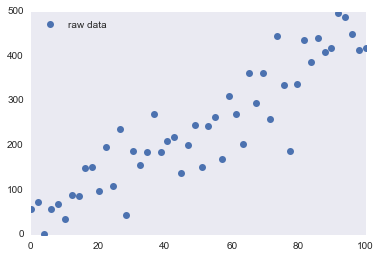

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

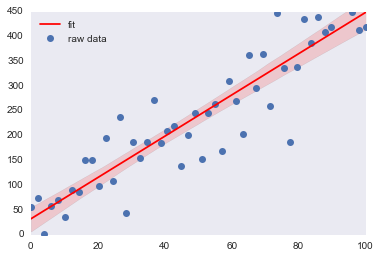

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[  32.122999,   36.32817 ,   40.533342, ...,  440.024632,  444.229804,
         448.434975],
       [   6.452861,   11.076892,   15.702347, ...,  406.556079,  410.383088,
         414.318081],
       [  55.35959 ,   59.295839,   63.059391, ...,  467.569211,  472.145364,
         476.721518]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 5.051 6.061 7.071 8.081 ...
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    rsquared: 0.832107260791
    intercept: 32.122998864
    slope: 4.16311976139

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

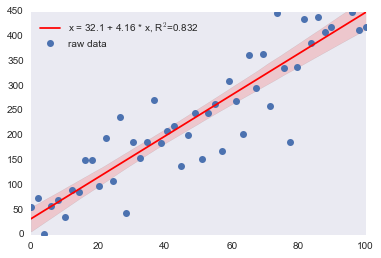

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

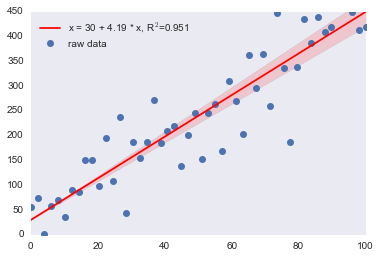

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

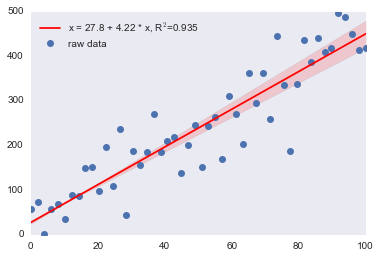

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

yrange
    Specify the range for the fit to use for the y-dimension
fit
    Choose the linear fitting method
line_xlim
    Specify how wide the range for the plot should be
ideal
    Draw an ideal line of the fit
xrange
    Specify the range for the fit to use for the x-dimension
fix
    Force the fit to go through a given point
ci
    Draw a confidence interval
nboot
    Set the number of bootstrap resamples for the confidence interval


In [10]:
psy.close('all')